## Chapter 5 - Bayes' Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-white')
color = '#87ceeb'

In [2]:
# helper function to return an optionally truncated normal distribution
def normal(mu, sigma=.75, nvals=11, lbound=0, ubound=1):
    dist = []
    for x in np.linspace(lbound,ubound,nvals):
        dist.append(np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.))))
    return dist

### Set up
Here, we create a vector of values that $\theta$ can take on.  This is the "grid" laid down on the parameter space.  It's a simple grid (only 1 dimension), but that's why what will follow is appropriately called a grid approximation.  By tweaking `n_theta_vals`, this grid can be course-grained (small values of `n_theta_vals`) or it can be very fine-grained (large values of `n_theta_vals`).  Start with small values to get a bit of an understading of how the approximation works and then crank it up to approach an exact solution.

In [3]:
n_theta_vals = 11
#n_theta_vals = 1001

theta = np.linspace(0, 1, n_theta_vals)

### Prior
`p_theta` is the vector of prior probabilities, each associated with the corresponding value of $\theta$ that we just created.  There are several alternative priors specified here:

- Uniform: specifies a belief that all values of $\theta$ are equally credible
- Triangle: values of $\theta$ near 0.5, are more credible with credibility steadily declining as $\theta$ moves away from 0.5
- (Truncated) Normal: a conventional normal distribution, truncated to the permissible range of $\theta$ values (i.e., 0-1)

Try out each of them.  Tweak the mean and standard deviation of the normal distribution to see how they influence the posterior.

In [4]:
# uniform prior
p_theta = np.ones_like(theta)

# triangle prior
#p_theta = np.minimum(theta, 1-theta)

# (truncated) normal priors
# wide prior
#p_theta = normal(.5, 10, n_theta_vals)
# narrow prior
#p_theta = normal(.5, .04, n_theta_vals)

# normalize the vector so that priors sum to 1 (making them proper probabilities)
p_theta = p_theta / np.sum(p_theta)

### Data
This constructs a set of flip outcomes.  Specify the number of heads (i.e., `n_heads`) and the number of tails (i.e., `n_tails`).  There are three scenarios prepared:

1. 1 flip that comes up heads
2. 4 flips, 1 of which comes up heads (25% heads)
3. 40 flips, 10 of which come up heads (25% heads)

In [5]:
# example 1
n_heads = 1
n_tails = 0

# example 2
#n_heads = 1
#n_tails = 3

# example 3
#n_heads = 10
#n_tails = 30

data = np.repeat([1, 0], [n_heads, n_tails])

### Likelihood
Here, we calculate the likelihood of the data we just constructed (i.e., $p(data|\theta)$).  We will use a Bernoulli distribution and apply it to each of the values of $\theta$ we are entertaining.  We then multiply each likelihood by the prior associated with the corresponding value of $\theta$ and sum all of these values to arrive as what is sometimes called the _evidence_ (i.e., $p(data)$, or the denominator of Bayes' rule).

In [6]:
p_data_given_theta = (theta**n_heads) * ( (1-theta)**n_tails )

# calculate the evidence (P(D), the prior probability of the data)
p_data = np.sum(p_data_given_theta * p_theta)

### Inference
Here, we put it all together, by applying Bayes' rule to each prior/likelihood pair to generate a corresponding posterior for each value of $\theta$ we are entertaining.

In [7]:
p_theta_given_data = p_data_given_theta * p_theta / p_data

### Visualize
Plot the prior, the likelihood, and the posterior.

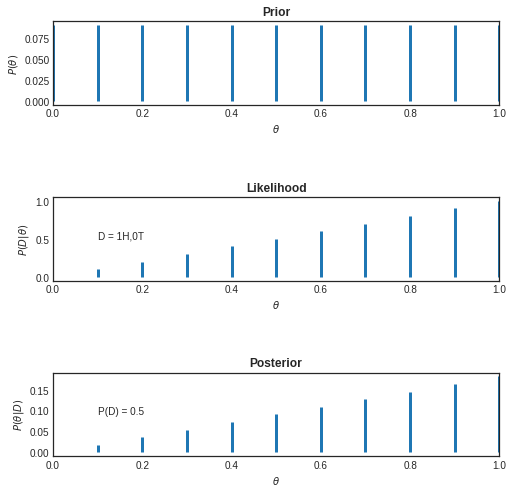

In [8]:
fig = plt.figure(figsize=(8, 8))
plt.subplots_adjust(hspace = 1.1)

# Plot the prior, the likelihood, and the posterior:
for i,dist in enumerate([p_theta, p_data_given_theta, p_theta_given_data]):
    plt.subplot(3, 1, i+1)
    markerline, stemlines, baseline = plt.stem(theta, dist, markerfmt=' ', basefmt=' ', use_line_collection=True)
    plt.setp(stemlines, 'linewidth', 3)
    plt.xlim(0, 1)
    plt.xlabel('$\\theta$')

# prior
plt.axes(fig.axes[0])
plt.xlabel(r'$\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior', weight='bold')

# likelihood
plt.axes(fig.axes[1])
plt.xlabel(r'$\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood', weight='bold')
plt.text(0.1, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))

# posterior
plt.axes(fig.axes[2])
plt.xlabel(r'$\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title('Posterior', weight='bold')
plt.text(0.1, np.max(p_theta_given_data)/2, 'P(D) = %g' % p_data)

plt.show()